## Customer Attrition Analysis

### Content

1.INTRODUCTION  

.What is Customer Churn?

1.LOADING LIBRARIES AND DATA

2.EXPLORATORY DATA ANALYSIS(EDA)

3.LABEL ENCODING

4.DATA CLEANING

5.COREELATION BETWEEN FEATURES

6.LOGISTIC REGRESSION

### Dataset containing telecommunications company data and showing churn status

### Introduction

What is Customer Churn? Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

 ### LOADING LIBRARIES AND DATA

In [1]:
#import the required libraries

import numpy as np  # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scipy.stats as st
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.ticker as mtick  # For specifying the axes tick format 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
df=pd.read_csv("C:\\Users\\aswat\\Desktop\\verizonet_data.csv")

In [3]:
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,NaN,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,NaN,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,NaN,NaN,0,0,NaN


### EXPLORATORY DATA ANALYSIS(EDA)

In [4]:
df.shape

(7043, 43)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [6]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,93486.070567,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,1856.767505,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,92101.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,93518.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,95329.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,96150.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [7]:
df.dtypes

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

In [8]:
df = df.drop("Customer ID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              3166 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Internet Type                      5517 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [9]:
df.isnull().sum()

Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges                   0
Total Refunds                     

### LABEL ENCODING

In [10]:
from sklearn.preprocessing import LabelEncoder

#Label encoding
label_encoder = LabelEncoder()
for i in df[["Offer","Phone Service", "Multiple Lines", "Internet Service", 
    "Internet Type","Online Security","Premium Tech Support","Unlimited Data","Churn Reason",
    "Online Backup" ,"Device Protection Plan","Contract","Payment Method","Gender","Under 30",
    "Senior Citizen","Married","Dependents","Referred a Friend","Churn Category","City",
    "Streaming Movies","Streaming TV","Streaming Music","Paperless Billing"]]:
    df[i] = label_encoder.fit_transform(df[i])
df .corr()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
Referred a Friend,1.000000,0.708291,0.361844,-0.145735,0.015418,0.008702,0.132641,0.002842,0.030680,0.046215,...,0.020929,-0.000907,-0.001832,-0.149122,0.125249,0.136018,0.140503,-0.091165,-0.055105,0.137398
Number of Referrals,0.708291,1.000000,0.326975,-0.139515,0.009947,0.006336,0.078080,-0.038984,0.087224,0.024131,...,-0.004052,0.001463,-0.007704,-0.286540,0.122843,0.265645,0.261847,-0.140121,-0.112472,0.263029
Tenure in Months,0.361844,0.326975,1.000000,-0.406471,0.008271,0.014596,0.332101,0.038582,0.026508,0.031410,...,0.017034,0.007146,-0.012102,-0.352861,0.396292,0.331037,0.323715,-0.200989,-0.155561,0.306166
Offer,-0.145735,-0.139515,-0.406471,1.000000,-0.011342,-0.012306,-0.163252,-0.025504,-0.002786,-0.033807,...,-0.002045,0.018471,0.012426,0.151112,-0.165745,-0.139378,-0.137909,0.070345,0.067932,-0.135936
Phone Service,0.015418,0.009947,0.008271,-0.011342,1.000000,0.486673,0.279690,-0.172209,0.108240,-0.100767,...,0.003340,-0.008830,0.009684,0.011942,0.023015,-0.010186,-0.015196,0.010421,-0.009951,0.001418
Avg Monthly Long Distance Charges,0.008702,0.006336,0.014596,-0.012306,0.486673,1.000000,0.136004,-0.068605,0.033596,-0.029658,...,-0.000611,0.005894,-0.018665,0.008120,0.023858,-0.011051,-0.014757,0.016678,-0.001392,0.002773
Multiple Lines,0.132641,0.078080,0.332101,-0.163252,0.279690,0.136004,1.000000,0.210564,-0.167751,0.092022,...,0.009910,-0.021183,0.003755,0.040102,0.133568,-0.029911,-0.028894,0.035677,0.021083,-0.061671
Internet Service,0.002842,-0.038984,0.038582,-0.025504,-0.172209,-0.068605,0.210564,1.000000,-0.725725,0.530043,...,0.007082,-0.016755,0.013534,0.227890,0.011521,-0.215473,-0.206310,0.122636,0.106724,-0.271806
Internet Type,0.030680,0.087224,0.026508,-0.002786,0.108240,0.033596,-0.167751,-0.725725,1.000000,-0.381482,...,-0.013428,0.010254,-0.012374,-0.348280,0.016590,0.327170,0.312548,-0.186804,-0.162979,0.348073
Avg Monthly GB Download,0.046215,0.024131,0.031410,-0.033807,-0.100767,-0.029658,0.092022,0.530043,-0.381482,1.000000,...,0.015221,-0.012029,0.027487,0.094932,0.016595,-0.097666,-0.088879,0.064806,0.048205,-0.092567


In [11]:
df .corr()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
Referred a Friend,1.000000,0.708291,0.361844,-0.145735,0.015418,0.008702,0.132641,0.002842,0.030680,0.046215,...,0.020929,-0.000907,-0.001832,-0.149122,0.125249,0.136018,0.140503,-0.091165,-0.055105,0.137398
Number of Referrals,0.708291,1.000000,0.326975,-0.139515,0.009947,0.006336,0.078080,-0.038984,0.087224,0.024131,...,-0.004052,0.001463,-0.007704,-0.286540,0.122843,0.265645,0.261847,-0.140121,-0.112472,0.263029
Tenure in Months,0.361844,0.326975,1.000000,-0.406471,0.008271,0.014596,0.332101,0.038582,0.026508,0.031410,...,0.017034,0.007146,-0.012102,-0.352861,0.396292,0.331037,0.323715,-0.200989,-0.155561,0.306166
Offer,-0.145735,-0.139515,-0.406471,1.000000,-0.011342,-0.012306,-0.163252,-0.025504,-0.002786,-0.033807,...,-0.002045,0.018471,0.012426,0.151112,-0.165745,-0.139378,-0.137909,0.070345,0.067932,-0.135936
Phone Service,0.015418,0.009947,0.008271,-0.011342,1.000000,0.486673,0.279690,-0.172209,0.108240,-0.100767,...,0.003340,-0.008830,0.009684,0.011942,0.023015,-0.010186,-0.015196,0.010421,-0.009951,0.001418
Avg Monthly Long Distance Charges,0.008702,0.006336,0.014596,-0.012306,0.486673,1.000000,0.136004,-0.068605,0.033596,-0.029658,...,-0.000611,0.005894,-0.018665,0.008120,0.023858,-0.011051,-0.014757,0.016678,-0.001392,0.002773
Multiple Lines,0.132641,0.078080,0.332101,-0.163252,0.279690,0.136004,1.000000,0.210564,-0.167751,0.092022,...,0.009910,-0.021183,0.003755,0.040102,0.133568,-0.029911,-0.028894,0.035677,0.021083,-0.061671
Internet Service,0.002842,-0.038984,0.038582,-0.025504,-0.172209,-0.068605,0.210564,1.000000,-0.725725,0.530043,...,0.007082,-0.016755,0.013534,0.227890,0.011521,-0.215473,-0.206310,0.122636,0.106724,-0.271806
Internet Type,0.030680,0.087224,0.026508,-0.002786,0.108240,0.033596,-0.167751,-0.725725,1.000000,-0.381482,...,-0.013428,0.010254,-0.012374,-0.348280,0.016590,0.327170,0.312548,-0.186804,-0.162979,0.348073
Avg Monthly GB Download,0.046215,0.024131,0.031410,-0.033807,-0.100767,-0.029658,0.092022,0.530043,-0.381482,1.000000,...,0.015221,-0.012029,0.027487,0.094932,0.016595,-0.097666,-0.088879,0.064806,0.048205,-0.092567


<Axes: >

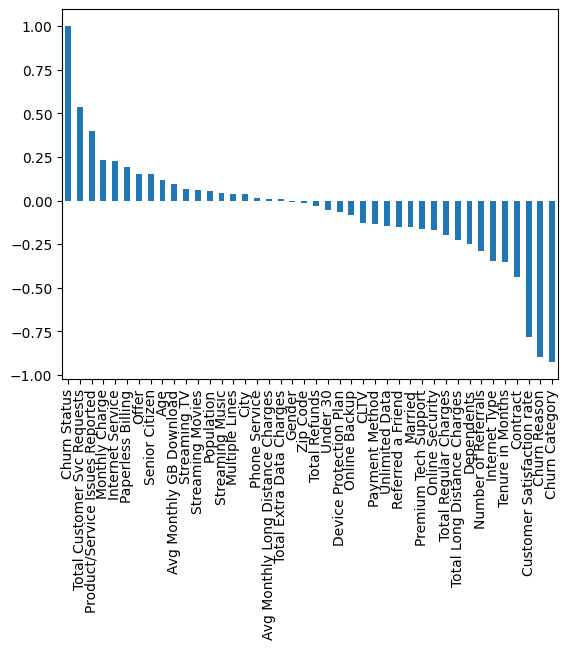

In [12]:
df.corr()['Churn Status'].sort_values(ascending=False).plot(kind='bar')

(array([2720., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

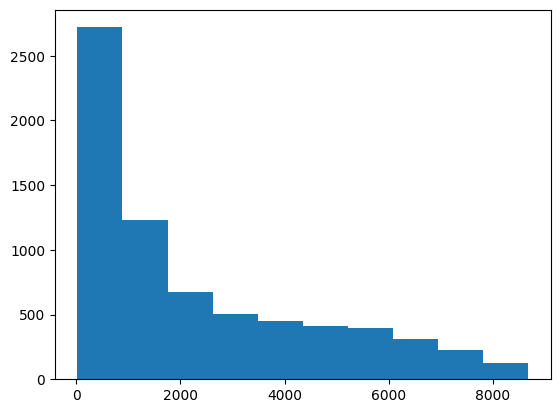

In [13]:
plt.hist(df['Total Regular Charges'])

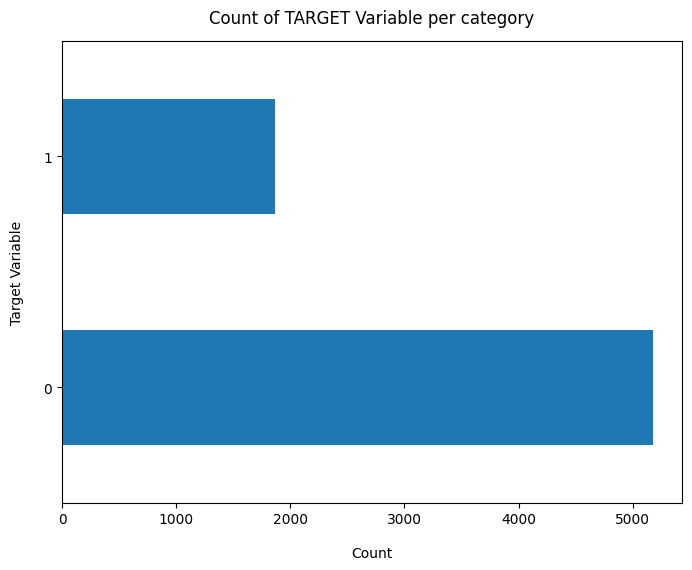

In [14]:
df['Churn Status'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

###  DATA CLEANING 

In [15]:
df.isnull().sum()

Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges                   0
Total Refunds                     

In [16]:
df.fillna(0, inplace=True)

In [17]:
import pandas as pd

# Assuming df is your DataFrame
fill_values = {col: 0.0 for col in df.columns}
df.fillna(fill_values, inplace=True)

In [18]:
df

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,0,0,1,5,0,0.00,0,1,2,9,...,554,90022,68701,1,5433,1,5,5,0,0.0
1,1,1,8,4,1,48.85,1,1,0,19,...,554,90063,55668,1,5302,1,3,5,0,0.0
2,0,0,18,3,1,11.33,1,1,2,57,...,554,90065,47534,1,3179,1,3,1,0,0.0
3,1,1,25,2,1,19.76,0,1,2,13,...,448,90303,27778,1,5337,2,11,1,1,2.0
4,1,1,37,2,1,6.33,1,1,0,15,...,1072,90602,26265,1,2793,4,8,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,5,1,22.77,0,0,3,0,...,514,92285,2182,0,5306,5,20,0,0,0.0
7039,1,1,24,2,1,36.05,1,1,1,24,...,2,92301,18980,0,2140,5,20,2,0,0.0
7040,1,4,72,5,1,29.66,1,1,0,59,...,22,92304,42,0,5560,5,20,2,0,4.0
7041,1,1,11,5,0,0.00,0,1,1,17,...,26,92305,301,0,2793,5,20,0,0,0.0


Text(0.5, 1.0, 'Percentage of Missing values')

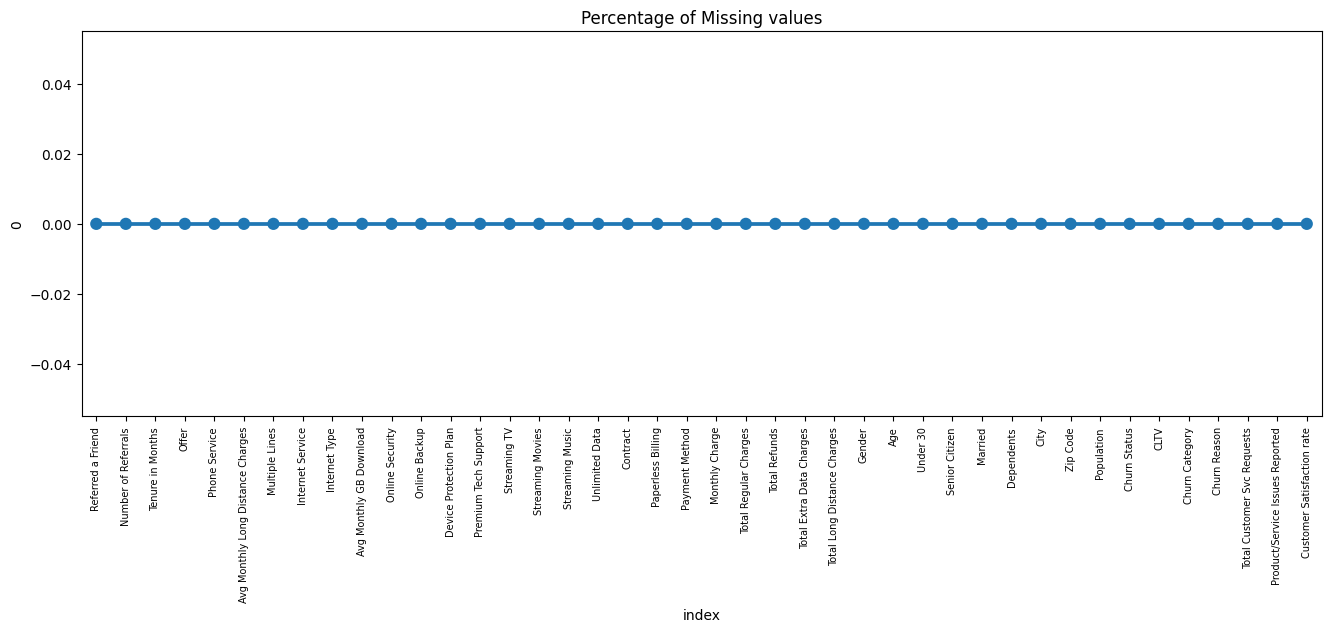

In [19]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()#This line calculates the number of missing values in each column of the DataFrame `df`,
# converts it into a percentage by multiplying it with 100 and dividing by the total number of rows in the DataFrame. The result is stored in a new DataFrame called `missing`, which has two columns - 'index' (column names) and the percentage of missing values.

plt.figure(figsize=(16,5))#his line creates a new figure with a specific size (16 inches in width and 5 inches in height) for the plot.
ax = sns.pointplot(x='index', y=0, data=missing)#This line creates a point plot using the seaborn library (`sns`).
#The 'index' column of the `missing` DataFrame is used as the x-axis and the percentage of missing values (0 column) is used as the y-axis.

plt.xticks(rotation=90, fontsize=7)#This line rotates the x-axis labels by 90 degrees and sets the font size to 7.
plt.title("Percentage of Missing values")

### COREELATION BETWEEN FEATURES

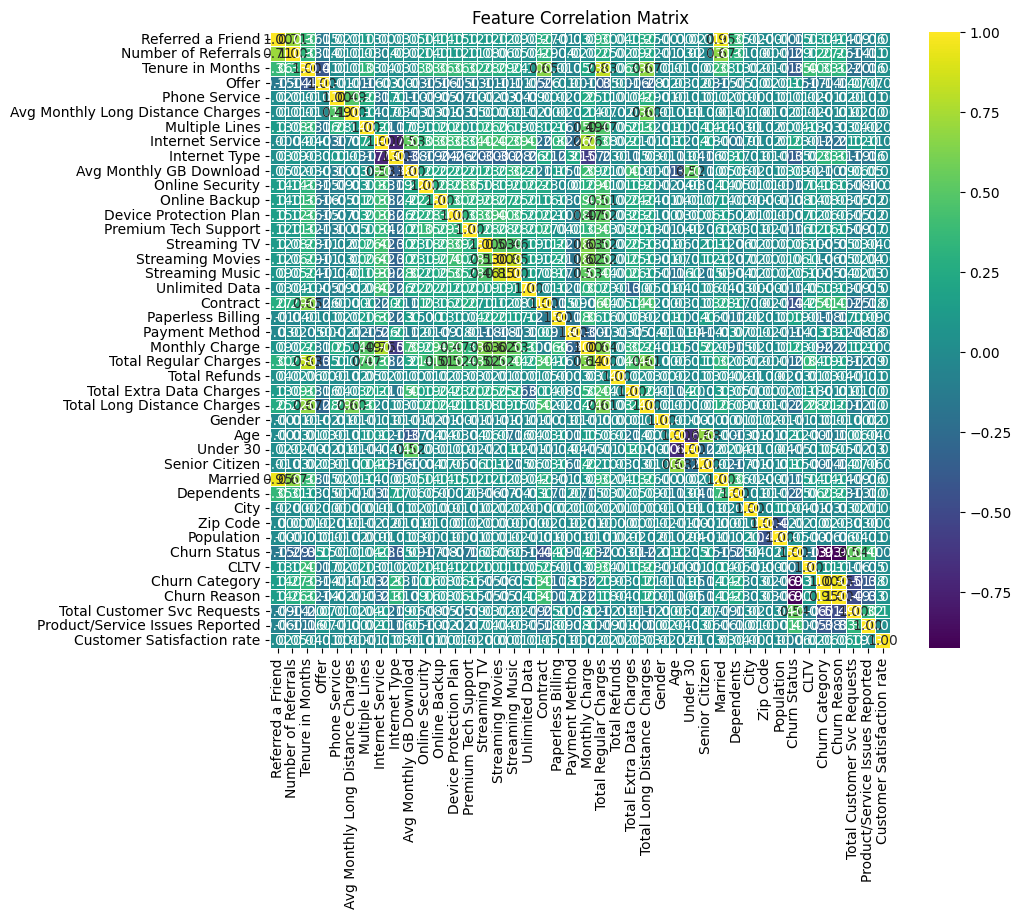

In [20]:

correlation = df.corr()

plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)

# Set the title
plt.title("Feature Correlation Matrix")

# Show the plot
plt.show()

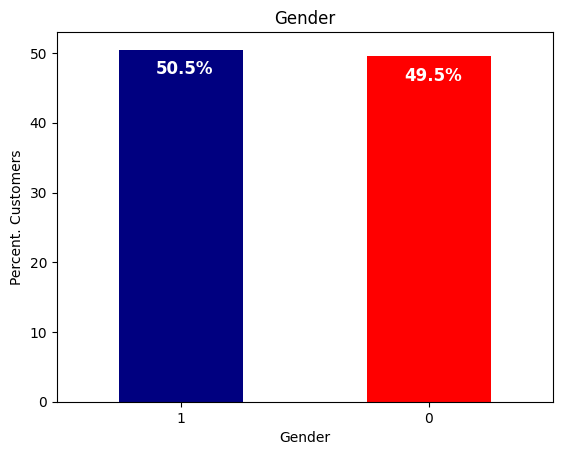

In [21]:
colors = ['#000080','#FF0000']
ax = (df['Gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)

ax.set_ylabel('Percent. Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('Percent. Customers')
ax.set_title('Gender')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizen')

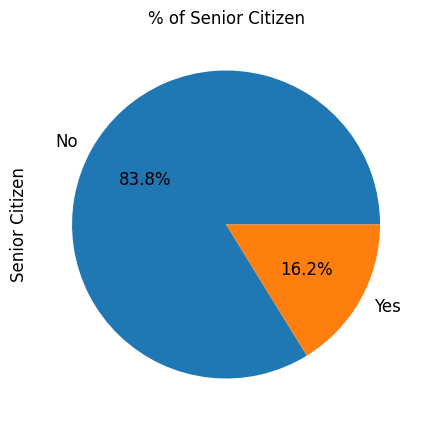

In [22]:
ax = (df['Senior Citizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                          
 
ax.set_ylabel('Senior Citizen',fontsize = 12)
ax.set_title('% of Senior Citizen', fontsize = 12)

### LOGISTIC REGRESSION

In [24]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,0,0,1,5,0,0.00,0,1,2,9,...,554,90022,68701,1,5433,1,5,5,0,0.0
1,1,1,8,4,1,48.85,1,1,0,19,...,554,90063,55668,1,5302,1,3,5,0,0.0
2,0,0,18,3,1,11.33,1,1,2,57,...,554,90065,47534,1,3179,1,3,1,0,0.0
3,1,1,25,2,1,19.76,0,1,2,13,...,448,90303,27778,1,5337,2,11,1,1,2.0
4,1,1,37,2,1,6.33,1,1,0,15,...,1072,90602,26265,1,2793,4,8,1,0,2.0


In [25]:
y= df_dummies['Churn Status'].values
X = df_dummies.drop(columns=['Churn Status'])
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0, 2))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

In [27]:
X_train

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Dependents,City,Zip Code,Population,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
2823,2.0,1.818182,1.436620,0.4,2.0,0.212843,2.0,0.0,2.000000,0.000000,...,0.0,0.447059,0.756871,0.008207,1.632644,2.0,2.0,0.222222,0.000000,1.6
3908,0.0,0.000000,0.281690,1.2,2.0,0.733347,0.0,2.0,0.000000,1.617021,...,0.0,1.500452,0.814116,0.884150,0.462086,2.0,2.0,0.000000,0.000000,0.0
1539,2.0,0.545455,0.000000,2.0,2.0,0.512102,0.0,2.0,0.666667,0.127660,...,0.0,1.545701,0.688242,0.972738,0.526573,0.4,0.3,0.444444,0.000000,0.4
2792,0.0,0.000000,0.281690,2.0,2.0,1.074215,0.0,0.0,2.000000,0.000000,...,0.0,0.745701,0.731176,0.066949,1.490772,2.0,2.0,0.888889,0.000000,1.6
896,2.0,1.272727,0.253521,2.0,2.0,1.005401,0.0,2.0,0.666667,0.638298,...,0.0,1.333937,1.744023,0.294945,1.001112,2.0,2.0,0.222222,0.333333,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2.0,0.909091,1.521127,2.0,2.0,1.328666,0.0,2.0,0.000000,0.085106,...,0.0,0.371041,1.764515,0.030017,1.017567,2.0,2.0,0.222222,0.333333,1.2
5695,0.0,0.000000,0.901408,2.0,2.0,1.987998,2.0,2.0,0.666667,0.255319,...,0.0,1.514932,1.978533,0.008511,1.243940,2.0,2.0,0.000000,0.000000,0.0
1361,0.0,0.000000,0.507042,2.0,0.0,0.000000,0.0,2.0,0.000000,1.127660,...,0.0,1.561991,1.666612,0.877216,1.413831,0.4,0.4,0.444444,0.000000,1.2
1547,0.0,0.000000,0.084507,2.0,2.0,1.298660,2.0,2.0,0.666667,0.063830,...,0.0,1.545701,0.688242,0.972738,1.593952,0.4,0.3,0.222222,0.666667,0.8


In [28]:
X_test

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Dependents,City,Zip Code,Population,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
1093,0.0,0.000000,1.830986,2.0,2.0,0.130826,2.0,2.0,1.333333,0.212766,...,2.0,0.503167,1.931046,0.066740,1.145208,2.0,2.0,0.666667,0.000000,0.0
646,2.0,1.818182,1.690141,2.0,2.0,0.180436,2.0,2.0,1.333333,0.468085,...,2.0,0.790950,0.082615,1.483804,1.411608,2.0,2.0,0.444444,0.333333,0.0
710,2.0,0.181818,1.042254,2.0,2.0,1.993199,2.0,2.0,0.666667,0.574468,...,0.0,0.001810,1.141324,0.148565,1.398710,2.0,2.0,0.000000,0.000000,0.0
3638,2.0,0.909091,0.056338,2.0,2.0,0.118824,2.0,2.0,0.666667,0.148936,...,0.0,0.483258,0.078061,0.762600,0.145430,2.0,2.0,0.222222,0.000000,0.0
5481,2.0,0.909091,1.661972,0.4,2.0,0.399280,2.0,2.0,1.333333,0.468085,...,0.0,0.714932,1.770694,0.036191,0.939293,2.0,2.0,0.222222,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150,2.0,0.909091,2.000000,0.0,2.0,0.728546,2.0,0.0,2.000000,0.000000,...,2.0,0.805430,1.146528,0.013736,1.418279,2.0,2.0,0.444444,0.000000,1.2
5095,2.0,1.454545,1.183099,2.0,0.0,0.000000,0.0,2.0,0.000000,0.212766,...,2.0,1.013575,1.056432,0.047324,0.321103,2.0,2.0,0.444444,0.000000,0.0
4410,2.0,1.454545,2.000000,2.0,0.0,0.000000,0.0,2.0,1.333333,0.468085,...,2.0,0.640724,1.768743,0.008834,1.825217,2.0,2.0,0.444444,0.000000,0.0
2161,2.0,0.181818,0.197183,2.0,2.0,1.160232,2.0,2.0,1.333333,0.702128,...,0.0,1.442534,0.565295,0.245569,0.290416,1.6,1.2,2.000000,0.000000,0.4


In [29]:
y_train

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [30]:
y_test

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [31]:
from sklearn.linear_model import LogisticRegression
# Increase max_iter
model = LogisticRegression(max_iter=1000) 
result=model.fit(X_train,y_train)

In [32]:
from sklearn import metrics
pred_test = model.predict(X_test)


print (metrics.accuracy_score(y_test, pred_test))

0.9971604353999054


Axes(0.125,0.11;0.775x0.77)


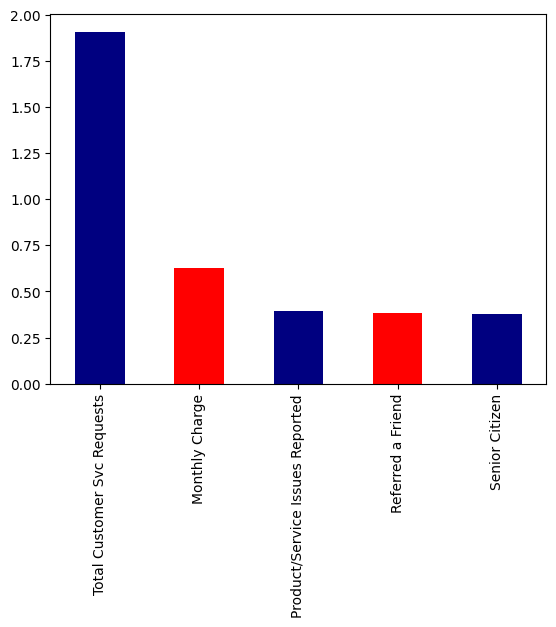

In [33]:
weight = pd.Series(model.coef_[0], index=X.columns.values)
print(weight.sort_values(ascending=False)[:5].plot(kind='bar', color=colors))

Axes(0.125,0.11;0.775x0.77)


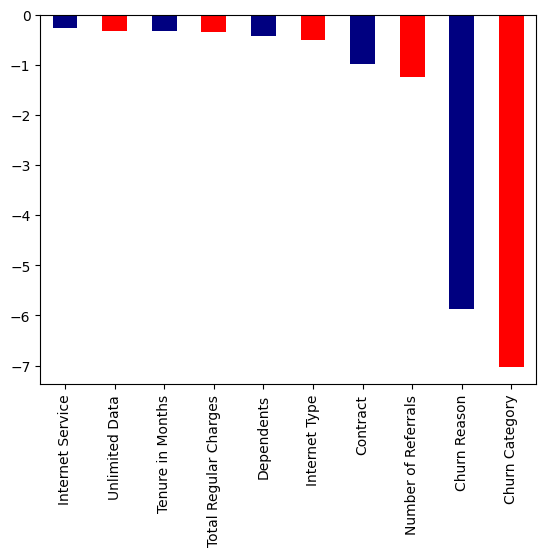

In [34]:
print(weight.sort_values(ascending = False)[-10:].plot(kind='bar',color=colors))

### MODEL EVALUATION

In [35]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
 
prediction_test = model.predict(X_test)
 
# Print results & confusion matrix
print (metrics.accuracy_score(y_test, prediction_test))
 
print(confusion_matrix(y_test,prediction_test))

0.9971604353999054
[[1547    0]
 [   6  560]]
